<a href="https://colab.research.google.com/github/alizzouz/cnn-vgg16/blob/main/dogsvscatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle 


In [ ]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list 

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9850        293  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11           1042         42  1.0              
michals22/coffee-dataset                                        Coffee dataset                                       24KB  2022-12-15 20:02:12           1242         43  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

In [ ]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 786M/788M [00:04<00:00, 169MB/s]
100% 788M/788M [00:04<00:00, 168MB/s]


In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
! unzip /content/drive/MyDrive/kaggle/microsoft-catsvsdogs-dataset.zip -d catsvsdogss

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: catsvsdogss/PetImages/Dog/550.jpg  
  inflating: catsvsdogss/PetImages/Dog/5500.jpg  
  inflating: catsvsdogss/PetImages/Dog/5501.jpg  
  inflating: catsvsdogss/PetImages/Dog/5502.jpg  
  inflating: catsvsdogss/PetImages/Dog/5503.jpg  
  inflating: catsvsdogss/PetImages/Dog/5504.jpg  
  inflating: catsvsdogss/PetImages/Dog/5505.jpg  
  inflating: catsvsdogss/PetImages/Dog/5506.jpg  
  inflating: catsvsdogss/PetImages/Dog/5507.jpg  
  inflating: catsvsdogss/PetImages/Dog/5508.jpg  
  inflating: catsvsdogss/PetImages/Dog/5509.jpg  
  inflating: catsvsdogss/PetImages/Dog/551.jpg  
  inflating: catsvsdogss/PetImages/Dog/5510.jpg  
  inflating: catsvsdogss/PetImages/Dog/5511.jpg  
  inflating: catsvsdogss/PetImages/Dog/5512.jpg  
  inflating: catsvsdogss/PetImages/Dog/5513.jpg  
  inflating: catsvsdogss/PetImages/Dog/5514.jpg  
  inflating: catsvsdogss/PetImages/Dog/5515.jpg  
  inflating: catsvsdogss

In [ ]:
source_path = '/content/drive/MyDrive/kaggle/catsvsdogss/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [ ]:
# Define root directory
root_dir = '/content/drive/MyDrive/kaggle/catsvsdogss'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  
  os.mkdir(root_path)
  train_dir = os.path.join(root_path, 'training')
  os.mkdir(train_dir)
  val_dir = os.path.join(root_path, 'validation')
  os.mkdir(val_dir)

  cat_train_dir = os.path.join(train_dir, 'cats')
  os.mkdir(cat_train_dir)
  dog_train_dir = os.path.join(train_dir, 'dogs')
  os.mkdir(dog_train_dir)

  cat_val_dir = os.path.join(val_dir, 'cats')
  os.mkdir(cat_val_dir)
  dog_val_dir = os.path.join(val_dir, 'dogs')
  os.mkdir(dog_val_dir)
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test your create_train_val_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/kaggle/catsvsdogss/training
/content/drive/MyDrive/kaggle/catsvsdogss/validation
/content/drive/MyDrive/kaggle/catsvsdogss/training/cats
/content/drive/MyDrive/kaggle/catsvsdogss/training/dogs
/content/drive/MyDrive/kaggle/catsvsdogss/validation/cats
/content/drive/MyDrive/kaggle/catsvsdogss/validation/dogs


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  source_list = os.listdir(SOURCE_DIR)
  
  train_list = random.sample(source_list, int(len(source_list)*SPLIT_SIZE))

  for img in source_list:
    if os.path.getsize(os.path.join(SOURCE_DIR, img)) == 0:
      print(img + "is zero length, so ignoring.")
    elif img in train_list:
      copyfile(os.path.join(SOURCE_DIR, img), os.path.join(TRAINING_DIR, img))
    else:
      copyfile(os.path.join(SOURCE_DIR, img), os.path.join(VALIDATION_DIR, img))

In [ ]:
! unzip /content/drive/MyDrive/kaggle/microsoft-catsvsdogs-dataset.zip -d catvsdog

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: catvsdog/PetImages/Dog/550.jpg  
  inflating: catvsdog/PetImages/Dog/5500.jpg  
  inflating: catvsdog/PetImages/Dog/5501.jpg  
  inflating: catvsdog/PetImages/Dog/5502.jpg  
  inflating: catvsdog/PetImages/Dog/5503.jpg  
  inflating: catvsdog/PetImages/Dog/5504.jpg  
  inflating: catvsdog/PetImages/Dog/5505.jpg  
  inflating: catvsdog/PetImages/Dog/5506.jpg  
  inflating: catvsdog/PetImages/Dog/5507.jpg  
  inflating: catvsdog/PetImages/Dog/5508.jpg  
  inflating: catvsdog/PetImages/Dog/5509.jpg  
  inflating: catvsdog/PetImages/Dog/551.jpg  
  inflating: catvsdog/PetImages/Dog/5510.jpg  
  inflating: catvsdog/PetImages/Dog/5511.jpg  
  inflating: catvsdog/PetImages/Dog/5512.jpg  
  inflating: catvsdog/PetImages/Dog/5513.jpg  
  inflating: catvsdog/PetImages/Dog/5514.jpg  
  inflating: catvsdog/PetImages/Dog/5515.jpg  
  inflating: catvsdog/PetImages/Dog/5516.jpg  
  inflating: catvsdog/PetImages

In [ ]:
# Define paths
CAT_SOURCE_DIR = "/content/drive/MyDrive/kaggle/catvsdog/PetImages/Cat"
DOG_SOURCE_DIR = "/content/drive/MyDrive/kaggle/catvsdog/PetImages/Dog"

TRAINING_DIR = "/content/drive/MyDrive/kaggle/catsvsdogss/training"
VALIDATION_DIR = "/content/drive/MyDrive/kaggle/catsvsdogss/validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpgis zero length, so ignoring.
11702.jpgis zero length, so ignoring.


Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1251 images of cats for validation
There are 1251 images of dogs for validation


In [ ]:
# Deletes all non-image files (there are two .db files bundled into the dataset)
!find "/content/drive/MyDrive/kaggle/catsvsdogs/training" -type f ! -name "*.jpg" -exec rm {} +

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class for both training and validation
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1/255)
   
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
# create_model for CNN using 4 CONVOLUTION LAYERS 
def create_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(), 
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'), 
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 

    return model

In [ ]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
  25/1125 [..............................] - ETA: 24:26 - loss: 0.6968 - accuracy: 0.5120

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

1125/1125 [==============================] - 688s 611ms/step - loss: 0.5982 - accuracy: 0.6676 - val_loss: 0.5359 - val_accuracy: 0.7326
Epoch 2/10
1125/1125 [==============================] - 666s 592ms/step - loss: 0.4636 - accuracy: 0.7794 - val_loss: 0.4108 - val_accuracy: 0.8062
Epoch 3/10
1125/1125 [==============================] - 669s 595ms/step - loss: 0.3736 - accuracy: 0.8332 - val_loss: 0.3571 - val_accuracy: 0.8377
Epoch 4/10
1125/1125 [==============================] - 668s 594ms/step - loss: 0.3017 - accuracy: 0.8704 - val_loss: 0.3401 - val_accuracy: 0.8505
Epoch 5/10
1125/1125 [==============================] - 662s 588ms/step - loss: 0.2368 - accuracy: 0.8996 - val_loss: 0.3334 - val_accuracy: 0.8573
Epoch 6/10
1125/1125 [==============================] - 660s 586ms/step - loss: 0.1845 - accuracy: 0.9261 - val_loss: 0.3700 - val_accuracy: 0.8565
Epoch 7/10
1125/1125 [==============================] - 644s 573ms/step - loss: 0.1266 - accuracy: 0.9512 - val_loss: 0.418

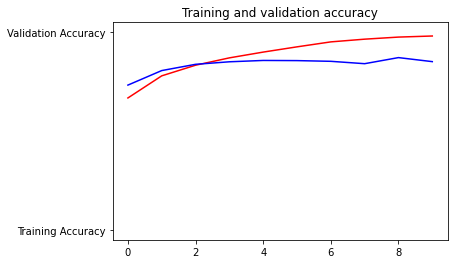

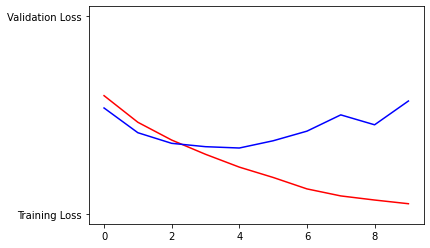

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

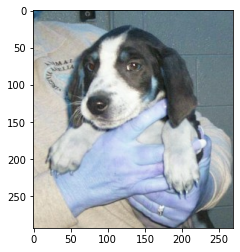

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/kaggle/dog.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(293, 269, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 142ms/step


array([[1.]], dtype=float32)